In [1]:
#%run "../app/dreams"
from sys import path
path.insert(0,'../app')
from dreams import dreams_mastersheet

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = dreams_mastersheet

# Base Cohorte

In [ ]:
base_cohort = df[
    (df.age_range!="not_valid_age")
    &(df.age_range!="25-29")
    &(df.timeOn_system=="required_Time_on")
]
base_cohort.code.count()

19697

In [ ]:
grp_all =  pd.read_excel("./repartitions/liste_filles_eligibles_parenting_Repartition de Groupe (2).xlsx",sheet_name="All")
grp_all.rename(columns={'dreams_code':'code'},inplace=True)
grp_all.code.count()                           

grp_ouest =  pd.read_excel("./repartitions/liste_filles_eligibles_parenting_Repartition de Groupe (2).xlsx",sheet_name="Eligible Parenting P-au-P")
grp_ouest.rename(columns={'dreams_code':'code'},inplace=True)
grp_ouest.code.count()                           

3072

1324

# Verfication des Beneficiaires OUEST

In [ ]:
code_ouest = grp_ouest[['code']]

verification_ouest = code_ouest.merge(base_cohort,how='left',on='code')
verification_ouest.code.count()

1324

In [ ]:
verification_ouest.to_excel('verification_ouest_services.xlsx',na_rep="NULL",index=False)

### Curriculum OUEST

In [ ]:
verification_ouest.pivot_table(index=["actual_departement",'actual_commune'],columns="dreams_curriculum",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

dreams_curriculum                  curriculum_completed  curriculum_inc  \
actual_departement actual_commune                                         
Ouest              Carrefour                        188               1   
                   Delmas                            47               5   
                   Gressier                         104              13   
                   Kenscoff                         721              33   
                   Port-au-Prince                    75               3   
                   Pétionville                       36               2   
                   Tabarre                           96               0   
Grand Total                                        1267              57   

dreams_curriculum                  Grand Total  
actual_departement actual_commune               
Ouest              Carrefour               189  
                   Delmas                   52  
                   Gressier                117  
                   Kenscoff                754  
                   Port-au-Prince           78  
                   Pétionville              38  
                   Tabarre                  96  
Grand Total                               1324

In [ ]:
curriculum_ouest_completed = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")   
]

curriculum_ouest_incomplet = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")   
]

curriculum_ouest_non_recu = verification_ouest[
   (verification_ouest.curriculum=="non-recu")   
]


curriculum_ouest_completed.code.count()
curriculum_ouest_incomplet.code.count()
curriculum_ouest_non_recu.code.count()


1267

57

0

### Condoms

In [ ]:
curriculum_ouest_completed.pivot_table(index=["age_range"],columns="new_condoms",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)


curriculum_ouest_completed.pivot_table(index=['actual_departement',"age_range",'actual_commune'],columns="new_condoms",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

new_condoms,no,sensOuRecu,Grand Total
age_range,,,
10-14,670,61,731
15-19,383,153,536
Grand Total,1053,214,1267


new_condoms                                    no  sensOuRecu  Grand Total
actual_departement age_range actual_commune                               
Ouest              10-14     Carrefour        118           2          120
                             Delmas            20           1           21
                             Gressier          49          16           65
                             Kenscoff         378          33          411
                             Port-au-Prince    41           0           41
                             Pétionville       16           0           16
                             Tabarre           48           9           57
                   15-19     Carrefour         59           9           68
                             Delmas            22           4           26
                             Gressier          23          16           39
                             Kenscoff         200         110          310
                             Port-au-Prince    31           3           34
                             Pétionville       17           3           20
                             Tabarre           31           8           39
Grand Total                                  1053         214         1267

In [ ]:
curriculum_ouest_incomplet.pivot_table(index=["age_range"],columns="new_condoms",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)


curriculum_ouest_incomplet.pivot_table(index=['actual_departement',"age_range",'actual_commune'],columns="new_condoms",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

new_condoms,no,sensOuRecu,Grand Total
age_range,,,
10-14,38,1,39
15-19,10,8,18
Grand Total,48,9,57


new_condoms                                  no  sensOuRecu  Grand Total
actual_departement age_range actual_commune                             
Ouest              10-14     Carrefour        1           0            1
                             Delmas           5           0            5
                             Gressier         9           1           10
                             Kenscoff        22           0           22
                             Port-au-Prince   1           0            1
                   15-19     Gressier         3           0            3
                             Kenscoff         4           7           11
                             Port-au-Prince   1           1            2
                             Pétionville      2           0            2
Grand Total                                  48           9           57

### HTS 

In [ ]:
curriculum_ouest_completed.pivot_table(index=["newage_range"],columns="hts",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_ouest_completed.pivot_table(index=['actual_departement',"newage_range",'actual_commune'],columns="hts",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

hts,errata,tested_on_given_date,Grand Total
newage_range,,,
10-17,1142,74,1216
18-19,43,8,51
Grand Total,1185,82,1267


hts                                             errata  tested_on_given_date  \
actual_departement newage_range actual_commune                                 
Ouest              10-17        Carrefour          176                     4   
                                Delmas              40                     6   
                                Gressier            99                     3   
                                Kenscoff           645                    41   
                                Port-au-Prince      68                     5   
                                Pétionville         29                     6   
                                Tabarre             85                     9   
                   18-19        Carrefour            8                     0   
                                Delmas               1                     0   
                                Gressier             2                     0   
                                Kenscoff            27                     8   
                                Port-au-Prince       2                     0   
                                Pétionville          1                     0   
                                Tabarre              2                     0   
Grand Total                                       1185                    82   

hts                                             Grand Total  
actual_departement newage_range actual_commune               
Ouest              10-17        Carrefour               180  
                                Delmas                   46  
                                Gressier                102  
                                Kenscoff                686  
                                Port-au-Prince           73  
                                Pétionville              35  
                                Tabarre                  94  
                   18-19        Carrefour                 8  
                                Delmas                    1  
                                Gressier                  2  
                                Kenscoff                 35  
                                Port-au-Prince            2  
                                Pétionville               1  
                                Tabarre                   2  
Grand Total                                            1267

In [ ]:

curriculum_ouest_incomplet.pivot_table(index=["newage_range"],columns="hts",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_ouest_incomplet.pivot_table(index=['actual_departement',"newage_range",'actual_commune'],columns="hts",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

hts,errata,tested_on_given_date,Grand Total
newage_range,,,
10-17,48,8,56
18-19,1,0,1
Grand Total,49,8,57


hts                                             errata  tested_on_given_date  \
actual_departement newage_range actual_commune                                 
Ouest              10-17        Carrefour            1                     0   
                                Delmas               4                     1   
                                Gressier            11                     2   
                                Kenscoff            29                     3   
                                Port-au-Prince       2                     1   
                                Pétionville          1                     1   
                   18-19        Kenscoff             1                     0   
Grand Total                                         49                     8   

hts                                             Grand Total  
actual_departement newage_range actual_commune               
Ouest              10-17        Carrefour                 1  
                                Delmas                    5  
                                Gressier                 13  
                                Kenscoff                 32  
                                Port-au-Prince            3  
                                Pétionville               2  
                   18-19        Kenscoff                  1  
Grand Total                                              57

### PReP

In [ ]:


curriculum_ouest_incomplet.pivot_table(index=["newage_range"],columns="sens_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_ouest_incomplet.pivot_table(index=['actual_departement',"newage_range",'actual_commune'],columns="sens_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)



curriculum_ouest_incomplet.pivot_table(index=["newage_range"],columns="init_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_ouest_incomplet.pivot_table(index=['actual_departement',"newage_range",'actual_commune'],columns="init_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

sens_prep,errata,tested_on_given_date,Grand Total
newage_range,,,
10-17,55,1,56
18-19,1,0,1
Grand Total,56,1,57


sens_prep                                       errata  tested_on_given_date  \
actual_departement newage_range actual_commune                                 
Ouest              10-17        Carrefour            1                     0   
                                Delmas               5                     0   
                                Gressier            13                     0   
                                Kenscoff            32                     0   
                                Port-au-Prince       2                     1   
                                Pétionville          2                     0   
                   18-19        Kenscoff             1                     0   
Grand Total                                         56                     1   

sens_prep                                       Grand Total  
actual_departement newage_range actual_commune               
Ouest              10-17        Carrefour                 1  
                                Delmas                    5  
                                Gressier                 13  
                                Kenscoff                 32  
                                Port-au-Prince            3  
                                Pétionville               2  
                   18-19        Kenscoff                  1  
Grand Total                                              57

init_prep,errata,Grand Total
newage_range,,
10-17,56,56
18-19,1,1
Grand Total,57,57


init_prep                                       errata  Grand Total
actual_departement newage_range actual_commune                     
Ouest              10-17        Carrefour            1            1
                                Delmas               5            5
                                Gressier            13           13
                                Kenscoff            32           32
                                Port-au-Prince       3            3
                                Pétionville          2            2
                   18-19        Kenscoff             1            1
Grand Total                                         57           57

In [ ]:


curriculum_ouest_completed.pivot_table(index=["newage_range"],columns="sens_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_ouest_completed.pivot_table(index=['actual_departement',"newage_range",'actual_commune'],columns="sens_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)






curriculum_ouest_completed.pivot_table(index=["newage_range"],columns="init_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_ouest_completed.pivot_table(index=['actual_departement',"newage_range",'actual_commune'],columns="init_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

sens_prep,errata,tested_on_given_date,Grand Total
newage_range,,,
10-17,1212,4,1216
18-19,47,4,51
Grand Total,1259,8,1267


sens_prep                                       errata  tested_on_given_date  \
actual_departement newage_range actual_commune                                 
Ouest              10-17        Carrefour          180                     0   
                                Delmas              46                     0   
                                Gressier           102                     0   
                                Kenscoff           683                     3   
                                Port-au-Prince      72                     1   
                                Pétionville         35                     0   
                                Tabarre             94                     0   
                   18-19        Carrefour            8                     0   
                                Delmas               1                     0   
                                Gressier             2                     0   
                                Kenscoff            31                     4   
                                Port-au-Prince       2                     0   
                                Pétionville          1                     0   
                                Tabarre              2                     0   
Grand Total                                       1259                     8   

sens_prep                                       Grand Total  
actual_departement newage_range actual_commune               
Ouest              10-17        Carrefour               180  
                                Delmas                   46  
                                Gressier                102  
                                Kenscoff                686  
                                Port-au-Prince           73  
                                Pétionville              35  
                                Tabarre                  94  
                   18-19        Carrefour                 8  
                                Delmas                    1  
                                Gressier                  2  
                                Kenscoff                 35  
                                Port-au-Prince            2  
                                Pétionville               1  
                                Tabarre                   2  
Grand Total                                            1267

init_prep,errata,Grand Total
newage_range,,
10-17,1216,1216
18-19,51,51
Grand Total,1267,1267


init_prep                                       errata  Grand Total
actual_departement newage_range actual_commune                     
Ouest              10-17        Carrefour          180          180
                                Delmas              46           46
                                Gressier           102          102
                                Kenscoff           686          686
                                Port-au-Prince      73           73
                                Pétionville         35           35
                                Tabarre             94           94
                   18-19        Carrefour            8            8
                                Delmas               1            1
                                Gressier             2            2
                                Kenscoff            35           35
                                Port-au-Prince       2            2
                                Pétionville          1            1
                                Tabarre              2            2
Grand Total                                       1267         1267

# REPORT OUEST

## ouest_curr

In [ ]:
curriculum_1324 = verification_ouest.pivot_table(index=["actual_departement",'actual_commune'],columns="dreams_curriculum",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)

curriculum_1324.rename(columns={"curriculum_completed":"curriculum_complet","curriculum_inc":"curriculum incomplet"},inplace=True)
curriculum_1324

dreams_curriculum                  curriculum_complet  curriculum incomplet  \
actual_departement actual_commune                                             
Ouest              Carrefour                      188                     1   
                   Delmas                          47                     5   
                   Gressier                       104                    13   
                   Kenscoff                       721                    33   
                   Port-au-Prince                  75                     3   
                   Pétionville                     36                     2   
                   Tabarre                         96                     0   
Grand Total                                      1267                    57   

dreams_curriculum                  Grand Total  
actual_departement actual_commune               
Ouest              Carrefour               189  
                   Delmas                   52  
                   Gressier                117  
                   Kenscoff                754  
                   Port-au-Prince           78  
                   Pétionville              38  
                   Tabarre                  96  
Grand Total                               1324

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Le Service Curriculum')

Text(0.0, 633.5, '1267')

Text(1.0, 28.5, '57')

Text(-80, -20, 'source: HIVHaiti')

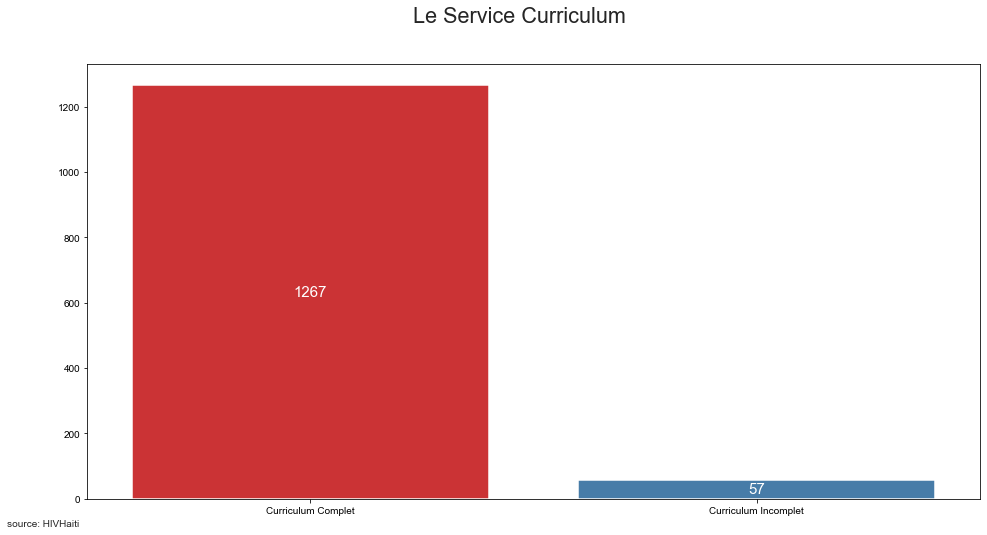

In [ ]:


curriculum_plot = pd.DataFrame(
    {"state":["Curriculum Complet","Curriculum Incomplet"],
    "data": [curriculum_ouest_completed.code.count(),
             curriculum_ouest_incomplet.code.count()
            ]                        
})





plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=curriculum_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Le Service Curriculum")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("curriculum_1324_ouest",dpi=1000)

## ouest_condoms

In [ ]:
curr_complet_condoms = curriculum_ouest_completed.pivot_table(index=["age_range"],columns="new_condoms",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
curr_complet_condoms

curr_incomplet_condoms = curriculum_ouest_incomplet.pivot_table(index=["age_range"],columns="new_condoms",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
curr_incomplet_condoms

new_condoms,no,sensOuRecu,Grand Total
age_range,,,
10-14,670,61,731
15-19,383,153,536
Grand Total,1053,214,1267


new_condoms,no,sensOuRecu,Grand Total
age_range,,,
10-14,38,1,39
15-19,10,8,18
Grand Total,48,9,57


(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Curriculum Complet & Service Condoms')

Text(0.0, 633.5, '1267')

Text(1.0, 107.0, '214')

Text(2.0, 526.5, '1053')

Text(-80, -20, 'source: HIVHaiti')

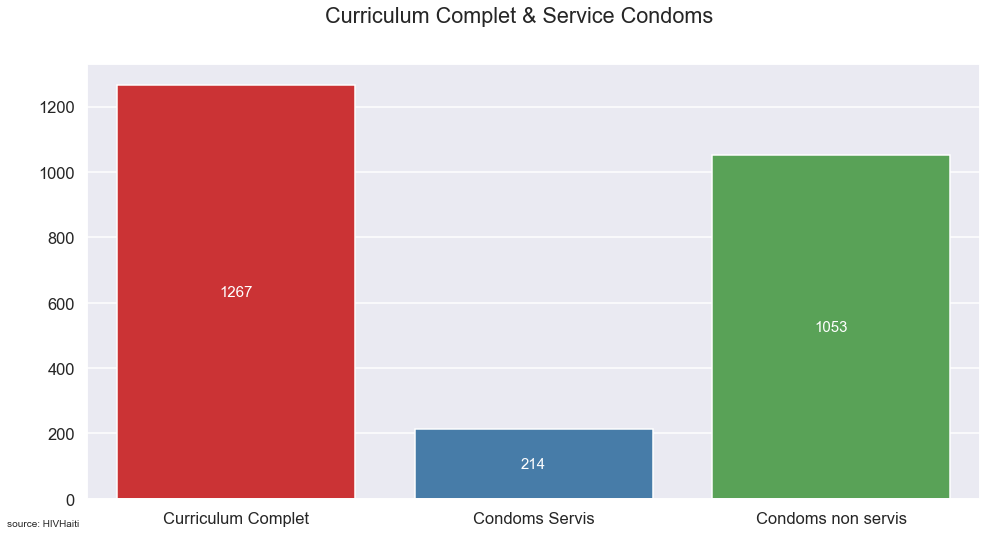

In [ ]:
currCompO_condR = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.new_condoms=="sensOuRecu")   
]

currCompO_no = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.new_condoms=="no")   
]





curriculum_complet_condoms_plot = pd.DataFrame(
    {"state":["Curriculum Complet","Condoms Servis", "Condoms non servis"],
    "data": [curriculum_ouest_completed.code.count(),
             currCompO_condR.code.count(),
             currCompO_no.code.count()
            ]                        
})





plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=curriculum_complet_condoms_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Curriculum Complet & Service Condoms")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("curr_condom_1324_ouest",dpi=1000)

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Curriculum Incomplet & Service Condoms')

Text(0.0, 28.5, '57')

Text(1.0, 4.5, '9')

Text(2.0, 24.0, '48')

Text(-80, -20, 'source: HIVHaiti')

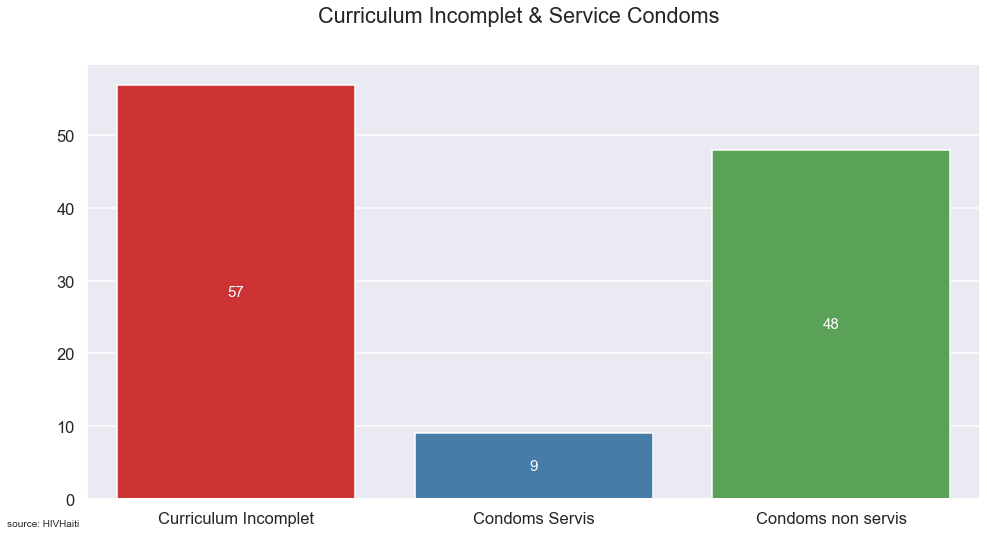

In [ ]:



currIncompO_condR = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.new_condoms=="sensOuRecu")     
]

currIncompO_no = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.new_condoms=="no")     
]




curriculum_incomplet_condoms_plot = pd.DataFrame(
    {"state":["Curriculum Incomplet","Condoms Servis", "Condoms non servis"],
    "data": [curriculum_ouest_incomplet.code.count(),
             currIncompO_condR.code.count(),
             currIncompO_no.code.count()
            ]                        
})





plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=curriculum_incomplet_condoms_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Curriculum Incomplet & Service Condoms")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("currIn_condom_1324_ouest",dpi=1000)

## ouest_hts

In [ ]:

currComp_hts = curriculum_ouest_completed.pivot_table(index=["newage_range"],columns="hts",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
currComp_hts.rename(columns={'errata':'non recu', 'tested_on_given_date':'recu'},inplace=True)
currComp_hts

currIncomp_hts =curriculum_ouest_incomplet.pivot_table(index=["newage_range"],columns="hts",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
currIncomp_hts.rename(columns={'errata':'non recu', 'tested_on_given_date':'recu'},inplace=True)
currIncomp_hts

hts,non recu,recu,Grand Total
newage_range,,,
10-17,1142,74,1216
18-19,43,8,51
Grand Total,1185,82,1267


hts,non recu,recu,Grand Total
newage_range,,,
10-17,48,8,56
18-19,1,0,1
Grand Total,49,8,57


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Curriculum Complet & Service HTS')

Text(1269.0, 0.0, '1267')

Text(84.0, 1.0, '82')

Text(1187.0, 2.0, '1185')

Text(45.0, 3.0, '43')

Text(-80, -20, 'source: HIVHaiti')

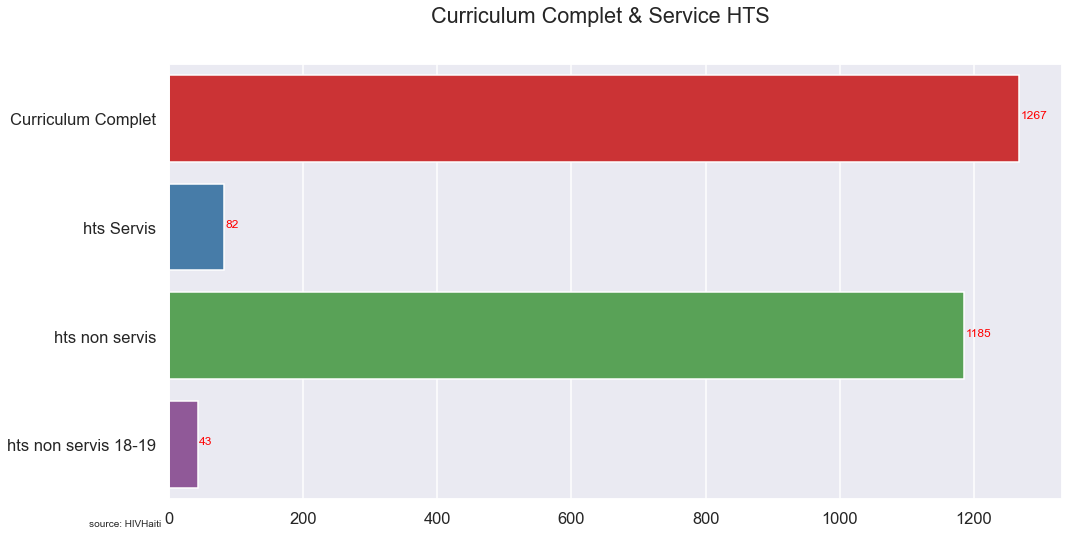

In [ ]:

COC_hts = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.hts=="tested_on_given_date")   
]

COC_htsInc = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.hts=="errata")   
]

COC_htsInc_1819 = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.hts=="errata")
   &(verification_ouest.newage_range=="18-19")   
]


curriculum_complet_hts_plot = pd.DataFrame(
    {"state":["Curriculum Complet","hts Servis", "hts non servis",'hts non servis 18-19'],
    "data": [curriculum_ouest_completed.code.count(),
             COC_hts.code.count(),
             COC_htsInc.code.count(),
             COC_htsInc_1819.code.count()
            ]                        
})



plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=curriculum_complet_hts_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Curriculum Complet & Service HTS")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("curr_hts_1324_ouest",dpi=400)





<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Curriculum Incomplet & Service HTS')

Text(59.0, 0.0, '57')

Text(10.0, 1.0, '8')

Text(51.0, 2.0, '49')

Text(3.0, 3.0, '1')

Text(-80, -20, 'source: HIVHaiti')

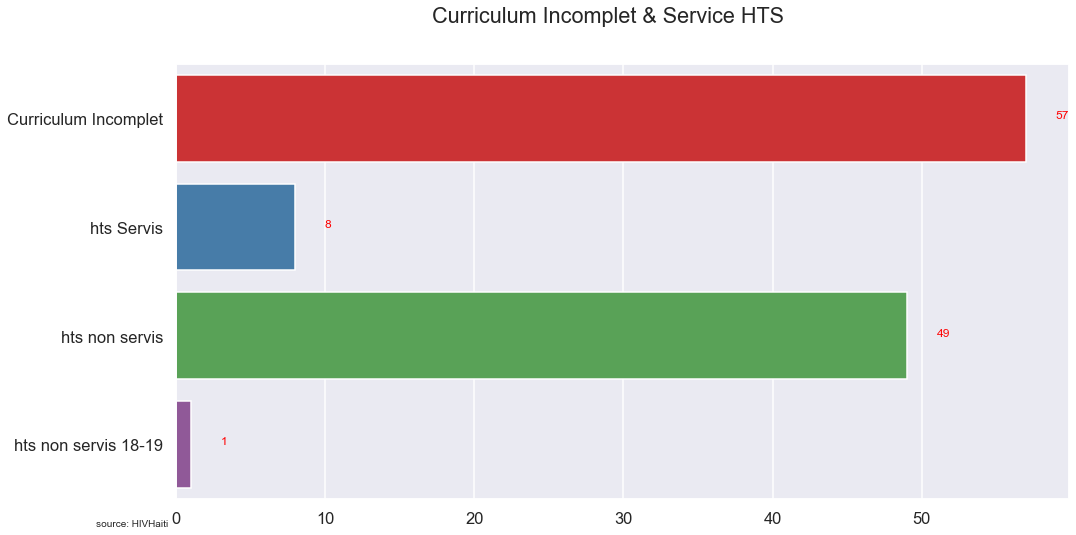

In [ ]:




COI_hts = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.hts=='tested_on_given_date')   
]

COI_htsInc = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.hts=='errata')   
]

COI_htsInc_1819 = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.hts=='errata')
   &(verification_ouest.newage_range=="18-19")      
]



curriculum_incomplet_hts_plot = pd.DataFrame(
    {"state":["Curriculum Incomplet","hts Servis", "hts non servis",'hts non servis 18-19'],
    "data": [curriculum_ouest_incomplet.code.count(),
             COI_hts.code.count(),
             COI_htsInc.code.count(),
             COI_htsInc_1819.code.count()
            ]                        
})


plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=curriculum_incomplet_hts_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Curriculum Incomplet & Service HTS")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("currIn_hts_1324_ouest",dpi=400)



## OUEST prep (sensibilisation only)

In [ ]:

curr_prep = curriculum_ouest_completed.pivot_table(index=["newage_range"],columns="sens_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"                             
)
curr_prep.rename(columns={"errata":"no","tested_on_given_date":"sensibilisee"},inplace=True)
curr_prep


currIn_prep = curriculum_ouest_incomplet.pivot_table(index=["newage_range"],columns="sens_prep",
                        values='code',
                        aggfunc='count',
                        fill_value=0,
                        margins=True,
                        margins_name="Grand Total"    
)

currIn_prep.rename(columns={"errata":"no","tested_on_given_date":"sensibilisee"},inplace=True)
currIn_prep

sens_prep,no,sensibilisee,Grand Total
newage_range,,,
10-17,1212,4,1216
18-19,47,4,51
Grand Total,1259,8,1267


sens_prep,no,sensibilisee,Grand Total
newage_range,,,
10-17,55,1,56
18-19,1,0,1
Grand Total,56,1,57


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Curriculum Complet & Service PrEP')

Text(1269.0, 0.0, '1267')

Text(10.0, 1.0, '8')

Text(1261.0, 2.0, '1259')

Text(-80, -20, 'source: HIVHaiti')

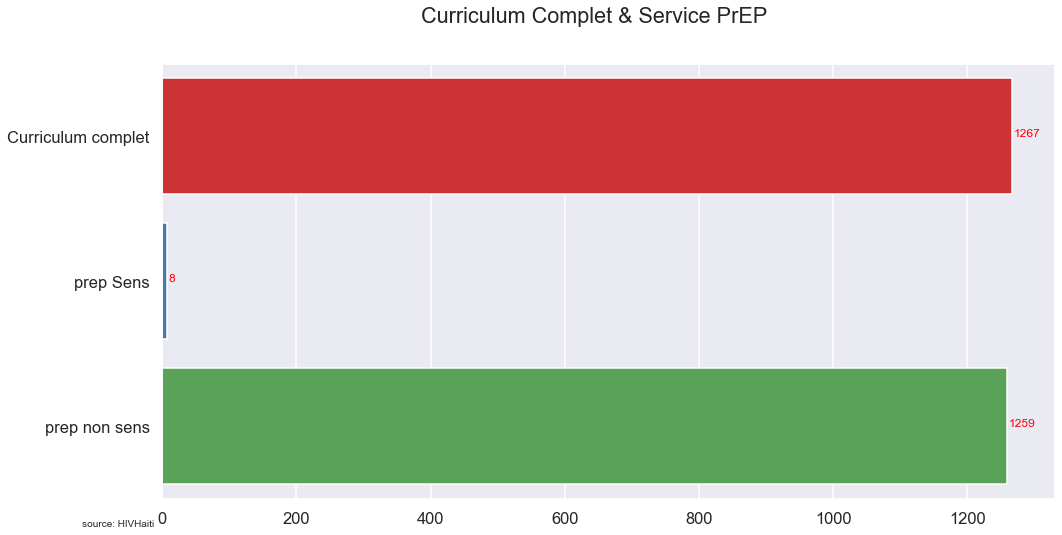

In [ ]:
COC_prep = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.sens_prep=="tested_on_given_date")   
]

COC_prepInc = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_completed")
   &(verification_ouest.sens_prep=="errata")   
]


curriculum_complet_prep_plot = pd.DataFrame(
    {"state":["Curriculum complet","prep Sens", "prep non sens"],
    "data": [curriculum_ouest_completed.code.count(),
             COC_prep.code.count(),
             COC_prepInc.code.count()
            ]                        
})


plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=curriculum_complet_prep_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Curriculum Complet & Service PrEP")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("curr_prep_1324_ouest",dpi=400)



<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Curriculum Incomplet & Service PrEP')

Text(59.0, 0.0, '57')

Text(3.0, 1.0, '1')

Text(58.0, 2.0, '56')

Text(-80, -20, 'source: HIVHaiti')

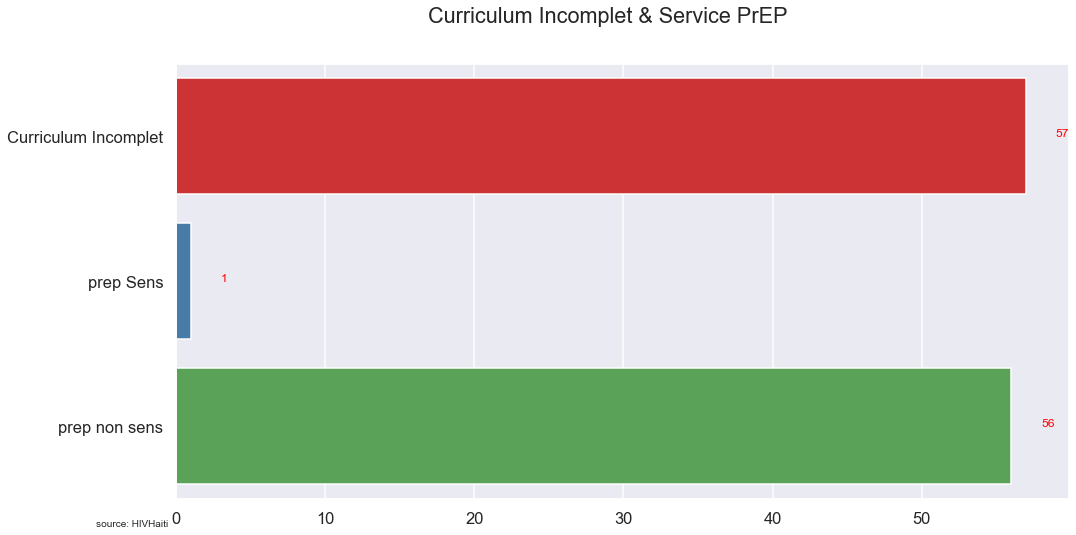

In [ ]:

COI_prep = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.sens_prep=="tested_on_given_date")   
]

COI_prepInc = verification_ouest[
   (verification_ouest.dreams_curriculum=="curriculum_inc")
   &(verification_ouest.sens_prep=="errata")   
]


curriculum_incomplet_prep_plot = pd.DataFrame(
    {"state":["Curriculum Incomplet","prep Sens", "prep non sens"],
    "data": [curriculum_ouest_incomplet.code.count(),
             COI_prep.code.count(),
             COI_prepInc.code.count()
            ]                        
})


plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=curriculum_incomplet_prep_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Curriculum Incomplet & Service PrEP")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("currIn_prep_1324_ouest",dpi=400)

## excel

In [ ]:
curriculum_service = pd.ExcelWriter(f"curriculum_service_1324.xlsx",engine="xlsxwriter")
curriculum_1324.to_excel(curriculum_service,sheet_name="resume",index=True,na_rep="NULL")
curriculum_ouest_completed.to_excel(curriculum_service,sheet_name="curriculum_complet",index=False,na_rep="NULL")
curriculum_ouest_incomplet.to_excel(curriculum_service,sheet_name="curriculum_incomplet",index=False,na_rep="NULL")
curriculum_service.save()

In [ ]:
condom_service = pd.ExcelWriter(f"condom_service_1324.xlsx",engine="xlsxwriter")
curr_complet_condoms.to_excel(condom_service,sheet_name="res_curr_complet_Condom",index=True,na_rep="NULL")
currCompO_no.to_excel(condom_service,sheet_name="curr_comp_condom_non_recu",index=False,na_rep="NULL")
curr_incomplet_condoms.to_excel(condom_service,sheet_name="res_Curr_comp_Condom_non_servis",index=True,na_rep="NULL")
currIncompO_no.to_excel(condom_service,sheet_name="curr_incomp_condom_non_recu",index=False,na_rep="NULL")
condom_service.save()

In [ ]:
# 18+
hts_service = pd.ExcelWriter(f"hts_service_1324.xlsx",engine="xlsxwriter")
currComp_hts.to_excel(hts_service,sheet_name="res_curr_complet_hts",index=True,na_rep="NULL")
COC_htsInc_1819.to_excel(hts_service,sheet_name="curr_comp_hts_non_recu",index=False,na_rep="NULL")
currIncomp_hts.to_excel(hts_service,sheet_name="res_Curr_comp_hts_non_servis",index=True,na_rep="NULL")
COI_htsInc_1819.to_excel(hts_service,sheet_name="curr_incomp_hts_non_recu",index=False,na_rep="NULL")
hts_service.save()

In [ ]:
prep_service = pd.ExcelWriter(f"prep_service_1324.xlsx",engine="xlsxwriter")
curr_prep.to_excel(prep_service,sheet_name="res_curr_complet_prep",index=True,na_rep="NULL")
COC_prepInc.to_excel(prep_service,sheet_name="curr_comp_prep_non_sens",index=False,na_rep="NULL")
currIn_prep.to_excel(prep_service,sheet_name="res_Curr_comp_prep_non_servis",index=True,na_rep="NULL")
COI_prepInc.to_excel(prep_service,sheet_name="curr_incomp_prep_non_sens",index=False,na_rep="NULL")
prep_service.save()

# Verification 2eme portions